# part 1 data preprocessing

In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf

In [2]:
data_file = 'data/raw_data/ratings.dat'

In [3]:
lines = open(data_file)

In [4]:
for i, line in enumerate(lines):
    if i >= 10:
        break
    print(line.strip())

1::122::5::838985046
1::185::5::838983525
1::231::5::838983392
1::292::5::838983421
1::316::5::838983392
1::329::5::838983392
1::355::5::838984474
1::356::5::838983653
1::362::5::838984885
1::364::5::838983707


In [4]:
count = 0
for line in lines:
    count = count + 1
print('Total amount of data: ', count)

Total amount of data:  10000043


### Read the Data

In [5]:
## User_id, Movie_id, Rating, Time_stamp

def read_raw_data(file_path):
    user_info = dict()
    lines = open(file_path)
    for line in lines:
        tmp = line.strip().split("::")
        if len(tmp) != 4:
            continue
        ui = user_info.get(tmp[0], None)
        if ui is None:
            user_info[tmp[0]] = [(tmp[1], tmp[2], tmp[3])]
        else:
            user_info[tmp[0]].append((tmp[1], tmp[2], tmp[3]))

    return user_info

In [6]:
user_info = read_raw_data(file_path=data_file)

In [7]:
user_info

{'1': [('122', '5', '838985046'),
  ('185', '5', '838983525'),
  ('231', '5', '838983392'),
  ('292', '5', '838983421'),
  ('316', '5', '838983392'),
  ('329', '5', '838983392'),
  ('355', '5', '838984474'),
  ('356', '5', '838983653'),
  ('362', '5', '838984885'),
  ('364', '5', '838983707'),
  ('370', '5', '838984596'),
  ('377', '5', '838983834'),
  ('420', '5', '838983834'),
  ('466', '5', '838984679'),
  ('480', '5', '838983653'),
  ('520', '5', '838984679'),
  ('539', '5', '838984068'),
  ('586', '5', '838984068'),
  ('588', '5', '838983339'),
  ('589', '5', '838983778'),
  ('594', '5', '838984679'),
  ('616', '5', '838984941')],
 '2': [('110', '5', '868245777'),
  ('151', '3', '868246450'),
  ('260', '5', '868244562'),
  ('376', '3', '868245920'),
  ('539', '3', '868246262'),
  ('590', '5', '868245608'),
  ('648', '2', '868244699'),
  ('719', '3', '868246191'),
  ('733', '3', '868244562'),
  ('736', '3', '868244698'),
  ('780', '3', '868244698'),
  ('786', '3', '868244562'),
  (

In [8]:
## check how many movies that user have been rated
user_action_num = dict()
for u, v in user_info.items():
    user_action_num[u] = len(v)

In [9]:
user_action_num

{'1': 22,
 '2': 20,
 '3': 33,
 '4': 38,
 '5': 87,
 '6': 42,
 '7': 109,
 '8': 800,
 '9': 24,
 '10': 123,
 '11': 68,
 '12': 54,
 '13': 146,
 '14': 100,
 '16': 42,
 '17': 63,
 '18': 413,
 '19': 233,
 '22': 47,
 '23': 44,
 '24': 35,
 '26': 32,
 '27': 38,
 '28': 28,
 '29': 42,
 '30': 147,
 '33': 26,
 '34': 639,
 '35': 132,
 '36': 479,
 '37': 80,
 '38': 250,
 '40': 57,
 '41': 150,
 '42': 37,
 '43': 81,
 '44': 99,
 '45': 73,
 '46': 29,
 '47': 126,
 '48': 21,
 '50': 46,
 '51': 380,
 '52': 41,
 '53': 102,
 '54': 49,
 '55': 32,
 '56': 427,
 '57': 117,
 '58': 207,
 '59': 20,
 '60': 119,
 '61': 27,
 '62': 28,
 '63': 36,
 '64': 44,
 '65': 569,
 '66': 41,
 '67': 69,
 '68': 111,
 '69': 42,
 '70': 87,
 '71': 20,
 '72': 22,
 '73': 302,
 '74': 20,
 '75': 55,
 '76': 51,
 '77': 101,
 '78': 468,
 '79': 76,
 '80': 37,
 '81': 64,
 '82': 100,
 '83': 102,
 '84': 25,
 '85': 47,
 '86': 101,
 '87': 52,
 '88': 219,
 '89': 50,
 '90': 44,
 '91': 203,
 '92': 158,
 '93': 31,
 '94': 120,
 '95': 40,
 '96': 501,
 '97': 3

In [16]:
## Check how many user invovled and their rating stats
user_stat = pd.DataFrame(user_action_num.items(),columns=['user_id','stats'])
user_stat['stats'].describe()

count    69878.00000
mean       143.10733
std        216.71258
min         20.00000
25%         35.00000
50%         69.00000
75%        156.00000
max       7359.00000
Name: stats, dtype: float64

### remove outliers

<AxesSubplot:ylabel='Density'>

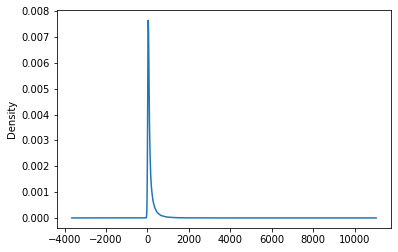

In [20]:
user_stat['stats'].plot.density()
## we could see that most the data points are below 2000, I decide to use 2000 as a threshold to remove the outliers

In [21]:
def extract_valid_user(user_info):
    user_info_filter = {}
    for k, v in user_info.items():
        if len(v) > 2000:
            continue
        user_info_filter[k] = v

    return user_info_filter
user_info = extract_valid_user(user_info)

In [14]:
len(user_info)
## the original dataset contains 69878 users while we only have 69871 user left after filtering.

69781

### split train&test set

In [22]:
def split_train_test(user_info):
    train_set = []
    test_set = []
    for k, v in user_info.items():
        tmp = sorted(v , key= lambda _:_[2]) ## sort by timestamp
        for i in range(len(tmp)):
            if i < len(tmp) - 2:
                train_set.append((str(k) + ',' + tmp[i][0] + ','+ tmp[i][1]))
            else:
                test_set.append((str(k) + ',' + tmp[i][0] + ','+ tmp[i][1]))

    return train_set, test_set

train_set, test_set = split_train_test(user_info)

In [23]:
def save_data(train_set, test_set, save_path_dir):
    random.shuffle(train_set)
    random.shuffle(test_set)

    with open(save_path_dir + "train_set", "w") as f:
        for line in train_set:
            f.write(line + '\n')

    with open(save_path_dir + "test_set", "w") as f:
        for line in test_set:
            f.write(line + '\n')

In [24]:
save_path = 'data/raw_data/'
save_data(train_set, test_set, save_path)

# part 2 hash encoding& tensorflow records(tfrecords)

In [25]:
def bkdr2hash64(str01):
    mask60 = 0x0fffffffffffffff
    seed = 131
    hash = 0
    for s in str01:
        hash = hash * seed + ord(s)

    return hash & mask60

In [26]:
print('User_id: ', bkdr2hash64('User_ID=1') )
print('Movie_id: ', bkdr2hash64('Movie_ID=1') )

User_id:  531190340175212615
Movie_id:  262478918409693206


In [27]:
def tohash(file, savePath):
    wfile = open(savePath,'w')
    with open(file) as f:
        for line in f:
            tmp =line.strip().split(',')
            user_id = bkdr2hash64('User_ID='+tmp[0])
            item_id = bkdr2hash64('Item_ID='+tmp[1])
            wfile.write(str(user_id)+','+ str(item_id)+','+tmp[2]+'\n')
        wfile.close()
    

In [28]:
tohash('data/raw_data/train_set','data/hashed_data/train_set_tohash')
tohash('data/raw_data/test_set',"data/hashed_data/test_set_tohash")

In [29]:
def get_tfrecords_example(feature, label):
    tfrecords_features = {
        'feature':tf.train.Feature(int64_list=tf.train.Int64List(value=feature)),
        'label':tf.train.Feature(float_list=tf.train.FloatList(value=label))
    }
    return tf.train.Example(features=tf.train.Features(feature=tfrecords_features))

In [30]:
def totfrecords(file, savePath):
    print('Process to tfrecord file: %s...'%file)
    num = 0
    writer = tf.io.TFRecordWriter(savePath + "/" + 'part-0000'+str(num)+'.tfrecords')
    lines = open(file)
    for i, line in enumerate(lines):
        tmp = line.strip().split(',')
        feature = [int(tmp[0]),int(tmp[1])]
        label = [float(1) if float(tmp[2])>=3 else float(0)]
        example = get_tfrecords_example(feature, label)
        writer.write(example.SerializeToString())
        if (i+1)%200000 == 0 :
            writer.close()
            num += 1
            writer = tf.io.TFRecordWriter(savePath + '/' + 'part_0000'+str(num)+'.tfrecords')
    print('Process to tfrecord file: %s end'%file)
    writer.close()

In [31]:
totfrecords('data/hashed_data/test_set_tohash','data/test/')
totfrecords('data/hashed_data/train_set_tohash','data/train/')

Process to tfrecord file: data/hashed_data/test_set_tohash...
Process to tfrecord file: data/hashed_data/test_set_tohash end
